### 1. Customer Data Cleaning and Analysis

Work with a raw customer dataset that contains missing values, inconsistent formatting, and incorrect data. Clean the data by handling missing values, standardizing formats, and removing duplicates. Use Pandas for data manipulation and create a clean dataset for further analysis.

#### Understand the Data

In [1]:
import pandas as pd

# Load the raw customer dataset
raw_data = pd.read_csv("shopping_trends_updated.csv")

In [2]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(raw_data.head())

First few rows of the dataset:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount

In [3]:
# Display basic information about the dataset
print("\nDataset Info:")
print(raw_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3

In [4]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(raw_data.describe())


Summary Statistics:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [5]:
# Display the column names
print("\nColumn Names:")
print(raw_data.columns)


Column Names:
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [6]:
# Display the number of rows and columns in the dataset
print("\nDataset Shape:")
print(raw_data.shape)


Dataset Shape:
(3900, 18)


#### Data Cleaning

In [7]:
# Check for missing values in the dataset
missing_values = raw_data.isnull().sum()

# Display columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Frequency of Purchases    1
dtype: int64


In [8]:
# Identify non-numeric values in the "Frequency of Purchases" column
non_numeric_values = raw_data[~raw_data['Frequency of Purchases'].apply(lambda x: isinstance(x, (int, float)))]

# Display non-numeric values
print("Non-numeric values in 'Frequency of Purchases' column:")
print(non_numeric_values)

# Convert non-numeric values to NaN
raw_data['Frequency of Purchases'] = pd.to_numeric(raw_data['Frequency of Purchases'], errors='coerce')

# Impute missing values with the mean of the column
raw_data['Frequency of Purchases'].fillna(raw_data['Frequency of Purchases'].mean(), inplace=True)

Non-numeric values in 'Frequency of Purchases' column:
      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  

In [9]:
# Identify and correct outliers in numerical columns
numerical_columns = ['Age', 'Purchase Amount (USD)']
for col in numerical_columns:
    # Calculate z-scores for each value in the column
    z_scores = (raw_data[col] - raw_data[col].mean()) / raw_data[col].std()
    # Identify outliers (values with z-score greater than 3 or less than -3)
    outliers = raw_data[abs(z_scores) > 3]
    # Replace outliers with the mean of the column
    raw_data.loc[abs(z_scores) > 3, col] = raw_data[col].mean()

# Correct spelling mistakes in categorical columns
categorical_columns = ['Gender', 'Item Purchased']
for col in categorical_columns:
    # Convert column values to lowercase for consistency
    raw_data[col] = raw_data[col].str.lower()
    # Correct common spelling mistakes
    raw_data[col].replace({'male': 'm', 'female': 'f'}, inplace=True)

# Remove duplicate rows
raw_data.drop_duplicates(inplace=True)

# Print summary statistics after data correction
print("Summary statistics after data correction:")
print(raw_data.describe())

Summary statistics after data correction:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  Frequency of Purchases  
count         3900.000000                     0.0  
mean            25.351538                     NaN  
std             14.447125                     NaN  
min              1.000000                     NaN  
25%             13.000000               

#### Data Analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt  # Add this line

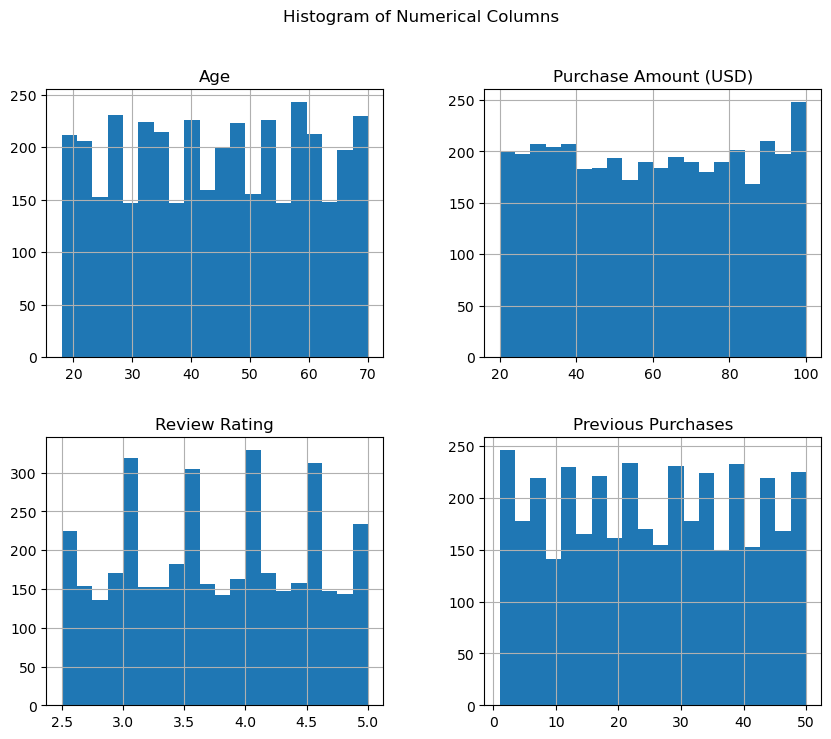

C:\Users\milto\AppData\Local\Temp\ipykernel_24276\3321438067.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")


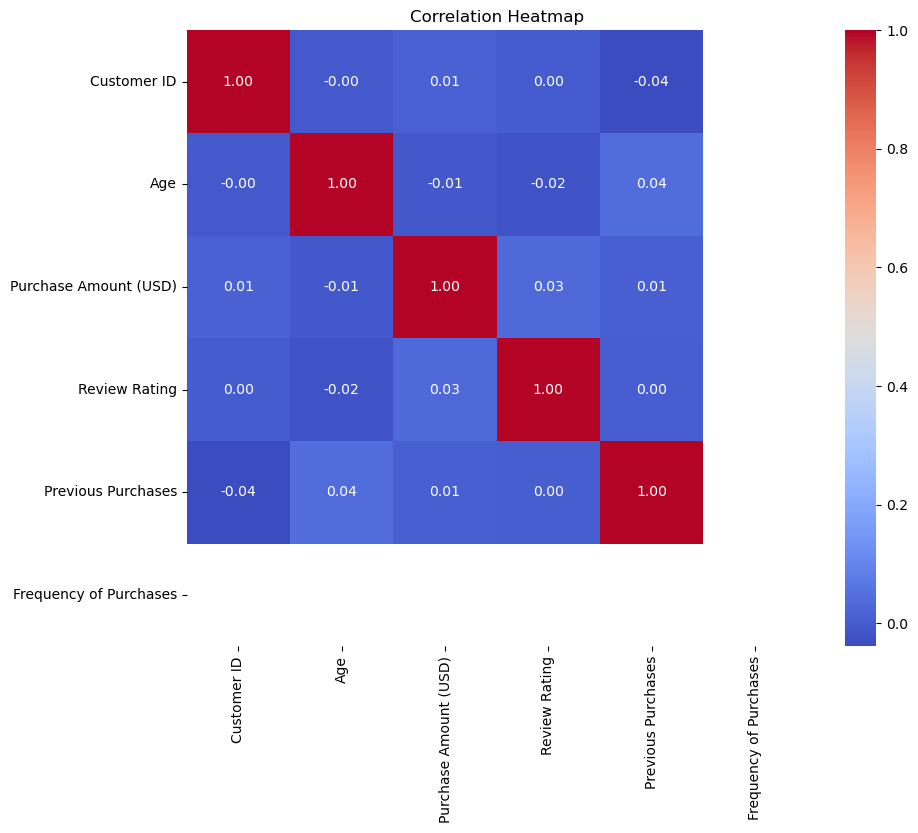

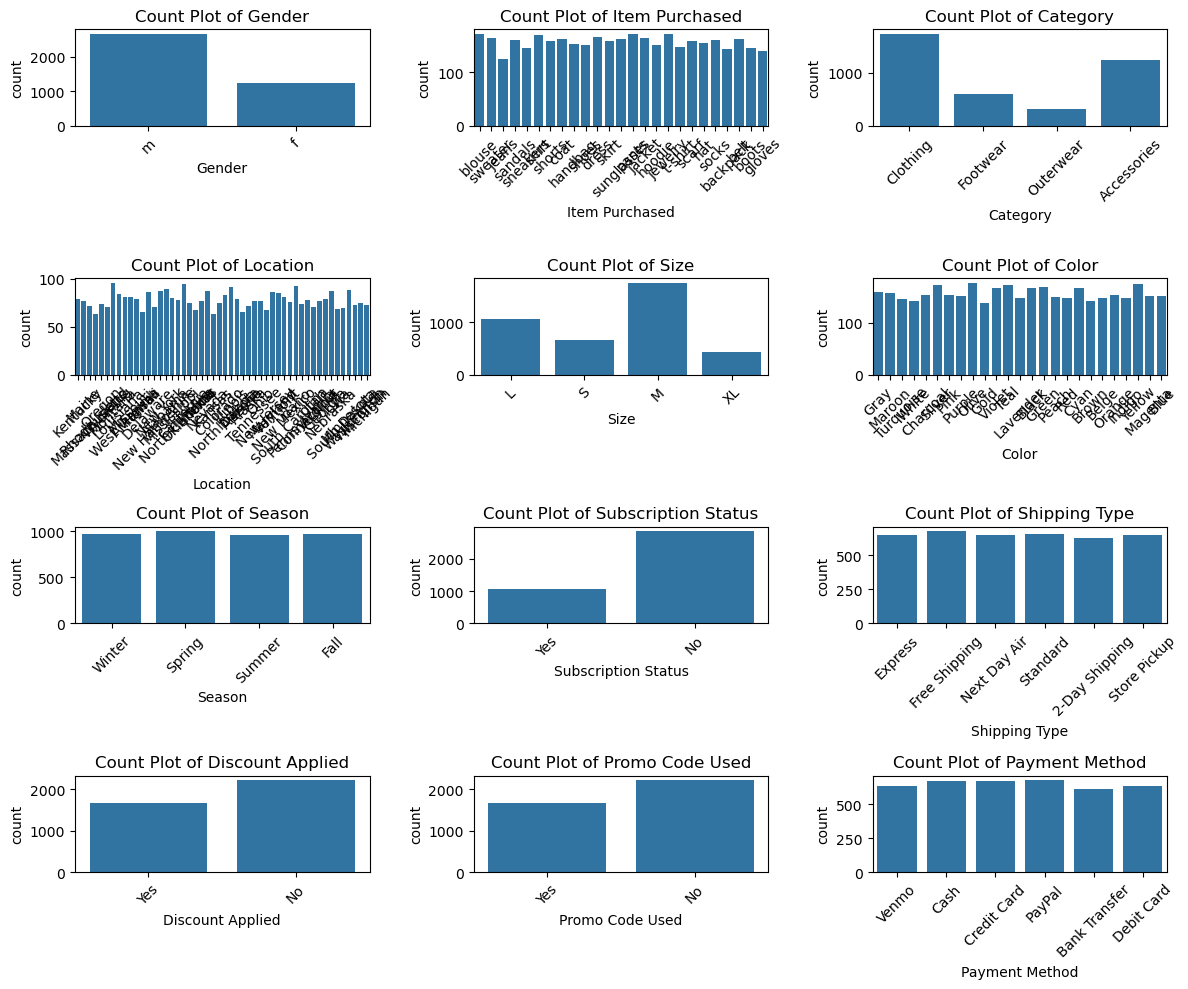

In [11]:
# Histogram of numerical columns
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
raw_data[numerical_columns].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histogram of Numerical Columns")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(raw_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Count plot of categorical columns
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method']
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=raw_data, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

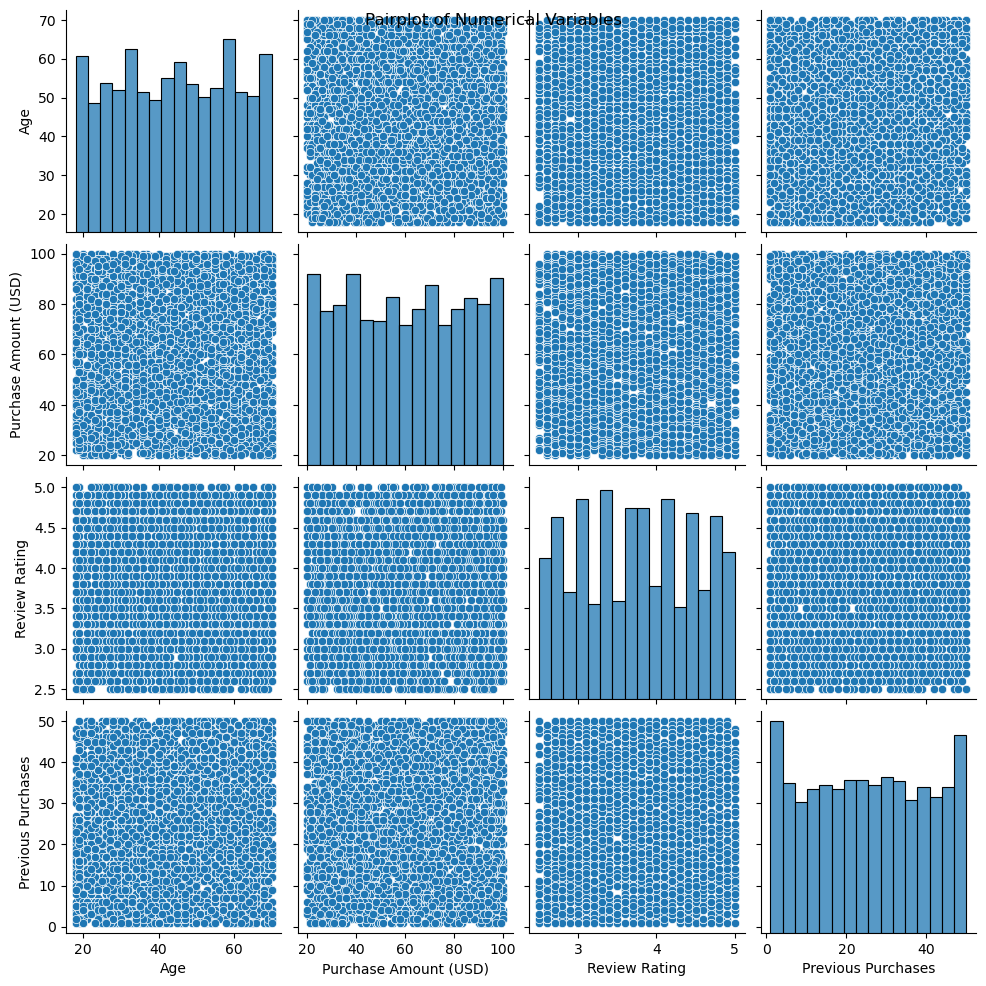

In [12]:
# Pairplot to visualize relationships between variables
sns.pairplot(raw_data[numerical_columns])
plt.suptitle("Pairplot of Numerical Variables")
plt.show()

Frequency distribution of items purchased:
blouse        171
jewelry       171
pants         171
shirt         169
dress         166
sweater       164
jacket        163
belt          161
sunglasses    161
coat          161
sandals       160
socks         159
skirt         158
shorts        157
scarf         157
hat           154
handbag       153
hoodie        151
shoes         150
t-shirt       147
sneakers      145
boots         144
backpack      143
gloves        140
jeans         124
Name: Item Purchased, dtype: int64


C:\Users\milto\AppData\Local\Temp\ipykernel_24276\4125369228.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')


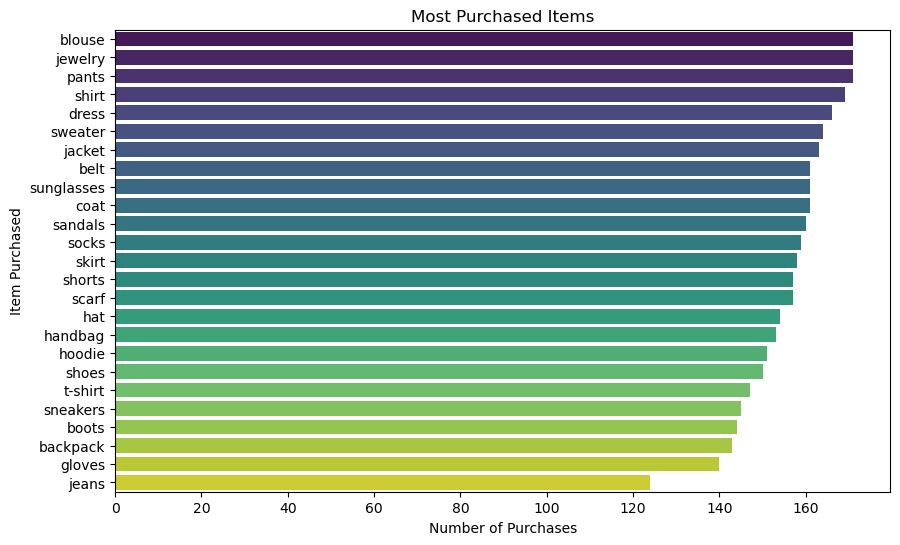


Average purchase amount for each item:
Item Purchased
t-shirt       62.911565
boots         62.625000
dress         62.168675
shoes         61.600000
shirt         61.136095
scarf         60.898089
blouse        60.877193
hat           60.876623
jeans         60.870968
gloves        60.550000
backpack      60.391608
shorts        60.082803
sunglasses    59.931677
belt          59.844720
sneakers      59.551724
skirt         59.506329
pants         59.005848
jewelry       58.538012
socks         58.188679
hoodie        58.059603
handbag       57.888889
sweater       57.695122
coat          57.608696
sandals       57.500000
jacket        56.742331
Name: Purchase Amount (USD), dtype: float64


C:\Users\milto\AppData\Local\Temp\ipykernel_24276\4125369228.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_purchase_amount.values, y=avg_purchase_amount.index, palette='viridis')


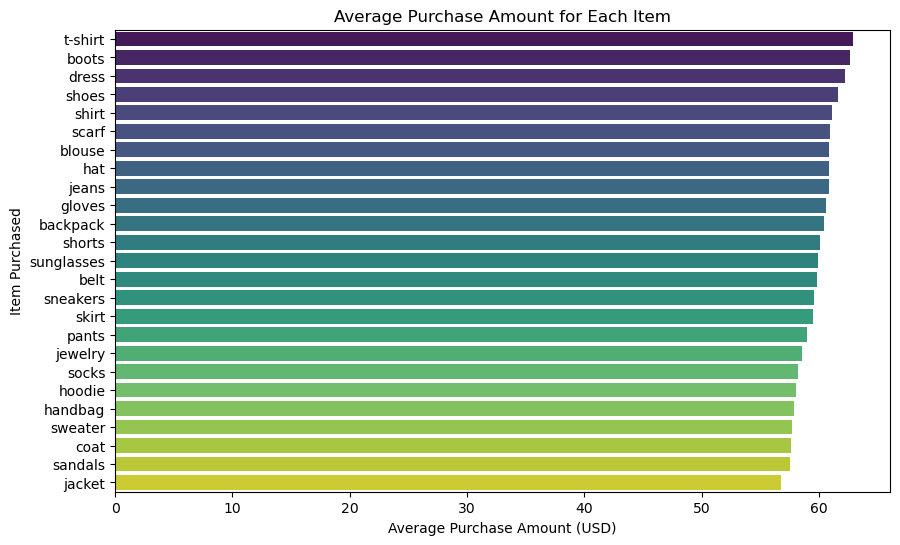

In [18]:
# Frequency distribution of items purchased
item_counts = raw_data['Item Purchased'].value_counts()
print("Frequency distribution of items purchased:")
print(item_counts)

# Plot the most purchased items
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
plt.title('Most Purchased Items')
plt.xlabel('Number of Purchases')
plt.ylabel('Item Purchased')
plt.show()

# Analysis of the average purchase amount for each item
avg_purchase_amount = raw_data.groupby('Item Purchased')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
print("\nAverage purchase amount for each item:")
print(avg_purchase_amount)

# Plot the average purchase amount for each item
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_purchase_amount.values, y=avg_purchase_amount.index, palette='viridis')
plt.title('Average Purchase Amount for Each Item')
plt.xlabel('Average Purchase Amount (USD)')
plt.ylabel('Item Purchased')
plt.show()
